# 월간 데이콘; KOSPI 기반 분석 시각화 경진대회

## Goal
---

### 타 국가와의 상관관계

우리나라는 수출 의존도가 높은 국가로, 다른 국가의 경제 상황에 영향을 많이 받습니다.

따라서 주요 국가들의 지수 등락률과 코스피의 등락률이 관계가 있는지 살펴보았습니다.

### 원자재와의 상관관계

금/원유와 같은 원자재와의 상관관계도 분석했습니다.

### 기준금리와의 상관관계

대한민국과 미국의 기준금리와도 코스피 지수와 상관관계가 존재하는지 알아보았습니다.

### 갭 상승 / 갭 하락과의 상관관계

'갭'이라고 해서, 전날의 종가와 당일의 시가에 차이가 많이 나는 경우를 말합니다.

차트로 볼 때 전날의 종가와 당일의 시가 사이에 빈 공간이 생기기 때문에 '갭'이라는 용어가 생겨났는데,

혹자는 이렇게 '갭'이 생겼을 때 주가는 방향성을 갖는다고 말합니다.

정말 그러한지 한번 살펴보도록 하겠습니다.


### 거래량과의 상관관계

거래량이 평소보다 많은 날에 상승/하락 추세가 정해진다고들 말합니다.

정말 그럴까요? 백테스팅을 통해 한번 알아보도록 하겠습니다.

## Index
---
1. 타 국가 지수와의 비교

2. 금, 원유와의 비교

3. 기준금리와의 비교

4. 갭과의 상관관계

5. 거래량과의 상관관계

6. 종합 정리

7. 인사이트

## Abstract
---


In [1]:
# 필요한 라이브러리 설치

!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [23]:
# 필요한 라이브러리 다운로드
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
# 데이터 살펴보기
kospi = pd.read_csv('kospi_data.csv')
kospi.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [4]:
kospi.tail()
# 1981년 5월 1일부터 2022년 8월 31일까지의 데이터가 존재하는 것을 알 수 있습니다.

,Date,Close,Open,High,Low,Volume,Change
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099
11023,2022-08-31,2472.05,2433.47,2473.75,2426.14,397290.0,0.0086


# 1. 타 국가와의 상관관계 알아보기
---

타 국가 지수로는

- 항셍지수
- 나스닥 지수
- 다우존스 지수
- 니케이225 지수

를 선택했습니다.

이 지수들의 등락률과 코스피 지수의 등락률이 관계가 있는지 살펴보겠습니다.

In [5]:
# 데이터 전처리 함수
def data_preprocessing(ticker):
    # 데이터 받아오기
    ticker_df = yf.Ticker(f'^{ticker}')
    data = ticker_df.history(start='1981-05-01', end='2022-09-01')

    # 데이터 전처리
    # Volume, Dividends, Stock Splits 열 삭제
    data.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    
    # 전일 대비 등락률, 누적 등락률 추가
    data['Change'] = ((data['Close'] / data['Open']) - 1) * 100
    data['Cumulative Return'] = ((data['Close'] / data['Close'].iloc[0]) - 1) * 100

    
    # 인덱스 초기화 + Date 형식 일치
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
    data['Date'] = pd.to_datetime(data['Date'])

    return data

# 항셍 지수
hsi = data_preprocessing('HSI')
# 나스닥 지수
nasdaq = data_preprocessing('IXIC')
# 다우존스 지수
doj = data_preprocessing('DJI')
# 니케이 지수
nikkei = data_preprocessing('N225')

# 코스피 누적 등락률 추가
kospi['Date'] = pd.to_datetime(kospi['Date'])
kospi['Cumulative Return'] = ((kospi['Close'] / kospi['Close'].iloc[0] - 1) * 100)

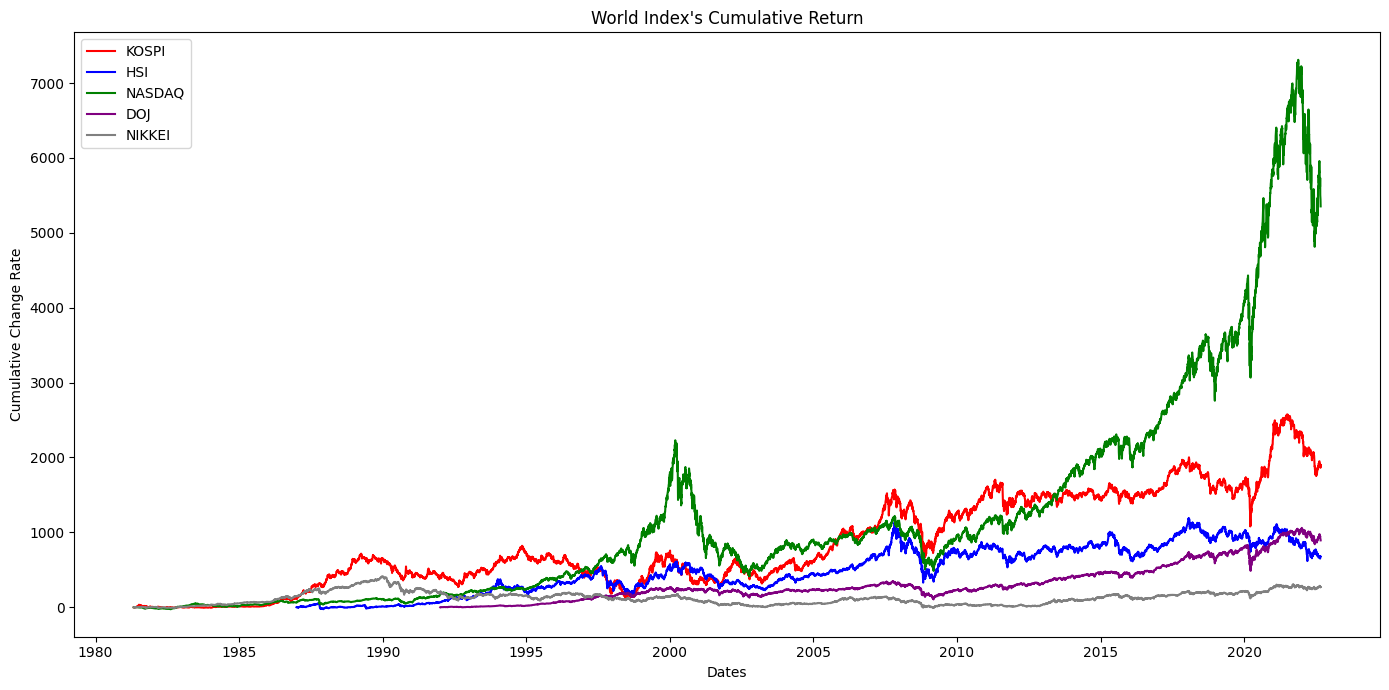

In [6]:
# 시각화
plt.figure(figsize=(14, 7))
plt.plot(kospi['Date'], kospi['Cumulative Return'], label='KOSPI', color='red')
plt.plot(hsi['Date'], hsi['Cumulative Return'], label='HSI', color='blue')
plt.plot(nasdaq['Date'], nasdaq['Cumulative Return'], label='NASDAQ', color='green')
plt.plot(doj['Date'], doj['Cumulative Return'], label='DOJ', color='purple')
plt.plot(nikkei['Date'], nikkei['Cumulative Return'], label='NIKKEI', color='gray')

plt.title("World Index's Cumulative Return")
plt.xlabel('Dates')
plt.ylabel('Cumulative Change Rate')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 그래프를 보면...
---

올라가는 시기와 내려가는 시기는 서로 비슷합니다. 그러나 그 폭은 각 지수가 다른 것 같은데요, 히트맵 상관관계 분석으로 한번 그 관계성을 알아보고자 합니다.

주식의 추세에는 단기 추세와 장기 추세가 있습니다. 단기적으로 하락하더라도 장기적으로 상승하는 추세라면, 곧 다시 상승할 수 있을 것이라는 예측이 가능합니다.

이를 바탕으로, 단기 추세 상관관계 분석에는 `Change` 열을 활용,

장기 추세 상관관계 분석에는 `Cumulative Return` 열을 활용하고자 합니다.

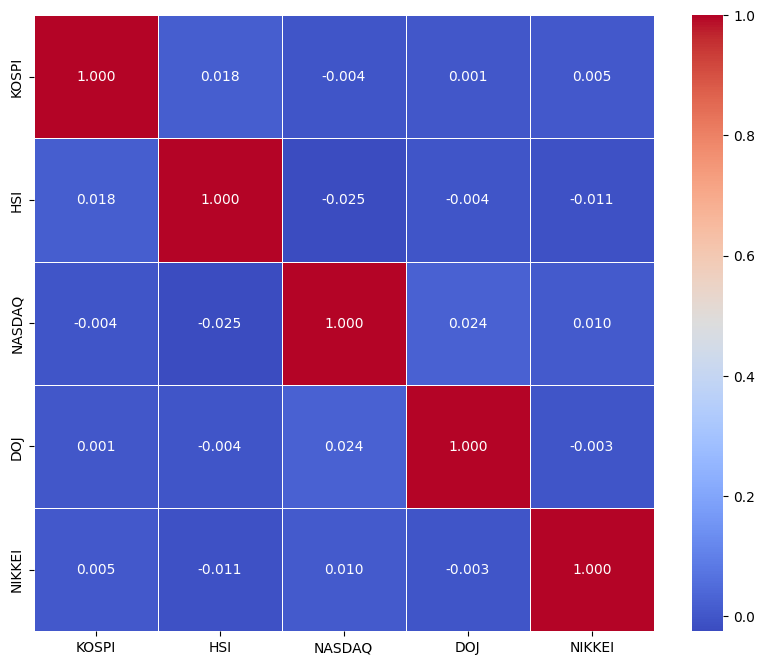

In [21]:
# 단기 추세 상관관계 분석
short_heatmap = pd.DataFrame({
    'KOSPI': kospi['Change'],
    'HSI': hsi['Change'],
    'NASDAQ': nasdaq['Change'],
    'DOJ': doj['Change'],
    'NIKKEI': nikkei['Change']
    })
corr_matrix = short_heatmap.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.show()


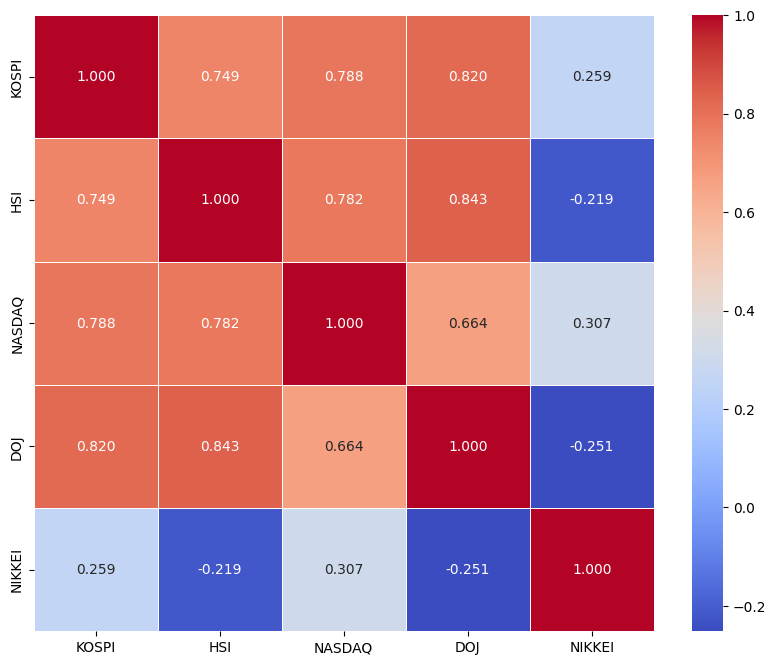

In [25]:
# 장기 추세 상관관계 분석
short_heatmap = pd.DataFrame({
    'KOSPI': kospi['Cumulative Return'],
    'HSI': hsi['Cumulative Return'],
    'NASDAQ': nasdaq['Cumulative Return'],
    'DOJ': doj['Cumulative Return'],
    'NIKKEI': nikkei['Cumulative Return']
    })
corr_matrix = short_heatmap.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.show()


## 히트맵을 살펴보면...
---
